<a href="https://colab.research.google.com/github/Chi68P1/AI/blob/main/Week5_ClinicDecisionSupportSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 40.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=815c63539d5524bc331ab1a30b73eeee44cc31f1d770cc97b16a458e596a6a13
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


44.99999999999999


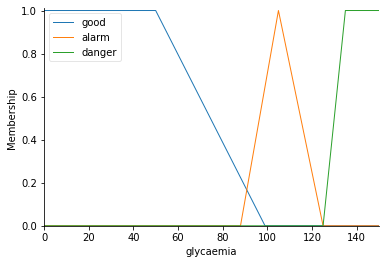

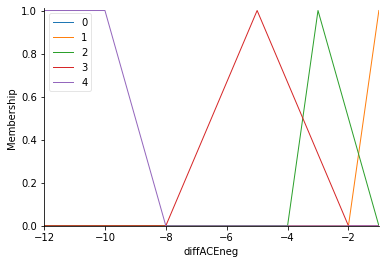

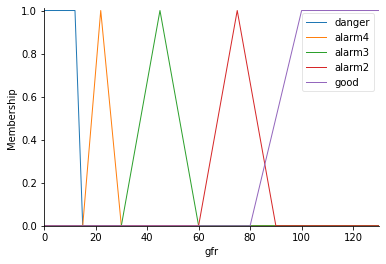

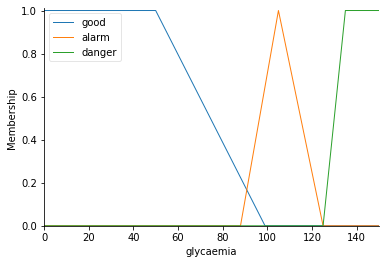

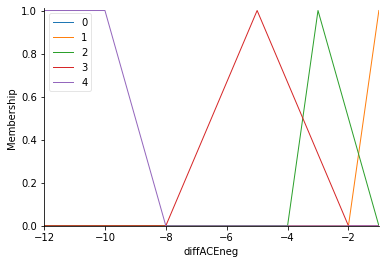

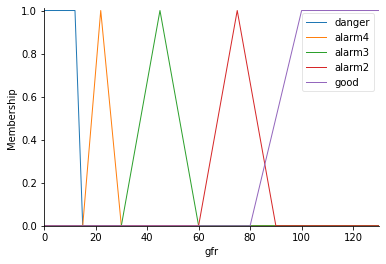

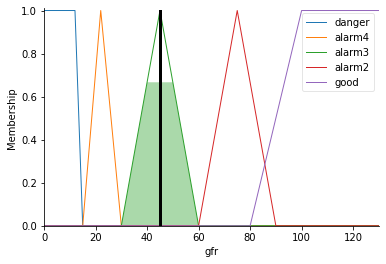

In [13]:
# ---------------------------------------------------------------
# Fuzzy logic–based clinical decision support system for the
# evaluation of renal function in post‐Transplant Patients
#---------------------------------------------------------------------
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

# x-axis
glycaemia     = ctrl.Antecedent(np.arange(0,151,1),'glycaemia')
diffACEneg    = ctrl.Antecedent(np.arange(-12,0,1),'diffACEneg')
gfr           = ctrl.Consequent(np.arange(0,131,1),'gfr')

#================================Draw============================================

glycaemia['good'] = fuzz.trapmf(glycaemia.universe,[0,0,50,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[88,105,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[125,135,150,150])

diffACEneg['0'] = fuzz.trimf(diffACEneg.universe,[-1, 0, 0])
diffACEneg['1'] = fuzz.trimf(diffACEneg.universe,[-2, -1, 0])
diffACEneg['2'] = fuzz.trimf(diffACEneg.universe,[-4, -3, -1])
diffACEneg['3'] = fuzz.trimf(diffACEneg.universe,[-8, -5, -2])
diffACEneg['4'] = fuzz.trapmf(diffACEneg.universe,[-12,-12 ,-10 ,-8])

gfr['danger'] = fuzz.trapmf(gfr.universe,[0, 0, 12, 15])
gfr['alarm4'] = fuzz.trimf(gfr.universe,[15, 22, 30])
gfr['alarm3'] = fuzz.trimf(gfr.universe,[30, 45, 60])
gfr['alarm2'] = fuzz.trimf(gfr.universe,[60, 75, 90])
gfr['good']   = fuzz.trapmf(gfr.universe,[80, 100, 130, 130])
#================================================================================

# Show
glycaemia.view()
diffACEneg.view()
gfr.view()

# Rules
rule1 = ctrl.Rule(glycaemia['good'] & diffACEneg['2'] , gfr['alarm3'])
rule2 = ctrl.Rule(glycaemia['alarm'] & diffACEneg['2'] , gfr['alarm3'])
rule3 = ctrl.Rule(glycaemia['good'] & diffACEneg['1'] , gfr['alarm2'])
rule4 = ctrl.Rule(glycaemia['alarm'] & diffACEneg['1'] , gfr['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & diffACEneg['3'] , gfr['alarm3'])
rule6 = ctrl.Rule(glycaemia['danger'] & diffACEneg['3'] , gfr['alarm4'])
rule7 = ctrl.Rule(glycaemia['good'] & diffACEneg['4'] , gfr['alarm2'])
rule8 = ctrl.Rule(glycaemia['good'] & diffACEneg['0'] , gfr['good'])
rule9 = ctrl.Rule(glycaemia['danger'] & diffACEneg['4'] , gfr['danger'])

rule = []
for i in range(1, 23):
    rule.append(locals()["rule" + str(i)])


# Learn
gfr_ctrl = ctrl.ControlSystem(rule)
gfring = ctrl.ControlSystemSimulation(gfr_ctrl)

glycaemia.view()
diffACEneg.view()
gfr.view()

# Input value

gfring.input['glycaemia'] = 65
gfring.input['diffACEneg'] = -6

# Caculating
gfring.compute()

# Output value
print(gfring.output['gfr'])

# Show
gfr.view(sim = gfring)